## Bicycle Sharing Assignment

#### Problem Statement:

A US bike-sharing provider BoomBikes wants a model for the prediction of demand for shared bikes after quarantine situation ends across the nation due to Covid-19

Essentially, the company wants —
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
**So interpretation is important!**

In [274]:
# import all libraries required for building the model

#import NumPy and Pandas and read the dataset provided by company
import numpy as np
import pandas as pd

#importing matplotlib and seaborn for data visualisation
import seaborn as sb
import matplotlib.pyplot as plt

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#statistc library to build the model and get the statistical value
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#sklearn library to build the model and scale the data
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

## Step 1. Reading the data

In [275]:
day=pd.read_csv('day.csv')
day.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [276]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### EDA

In [277]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Dropping columns which has no role in prediction
- instant :Dropping index column instant as it has all unique values and index is not required for prediction

- dteday :Dropping dteday column as the date has no role in prediction as it has all unique values. There are other features like mnth and yr that can be utilised in its place

- casual & registered: These two values give count of casual and registered users respectively. However, there is a column cnt containing sum of these two columns.


In [278]:

day=day.drop(['instant','dteday','casual','registered'],axis=1)

In [279]:
day.shape

(730, 12)

## Check for any null values

In [280]:
day.shape
# checking for Null vaues
day.columns[day.isna().sum() > 0]

Index([], dtype='object')

In [281]:
print(day.isna().sum()/len(day.columns))

## Columns containing 0 null values
print(day.columns[day.isna().sum() > 0])

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64
Index([], dtype='object')


## Inference - EDA:
1. The data contains no null values
2. Dropped the columns which has no role in data prediction
3. The data contains no outliers using describe()

## Step 2. Visualising the data
Understanding the data and find the relation between each

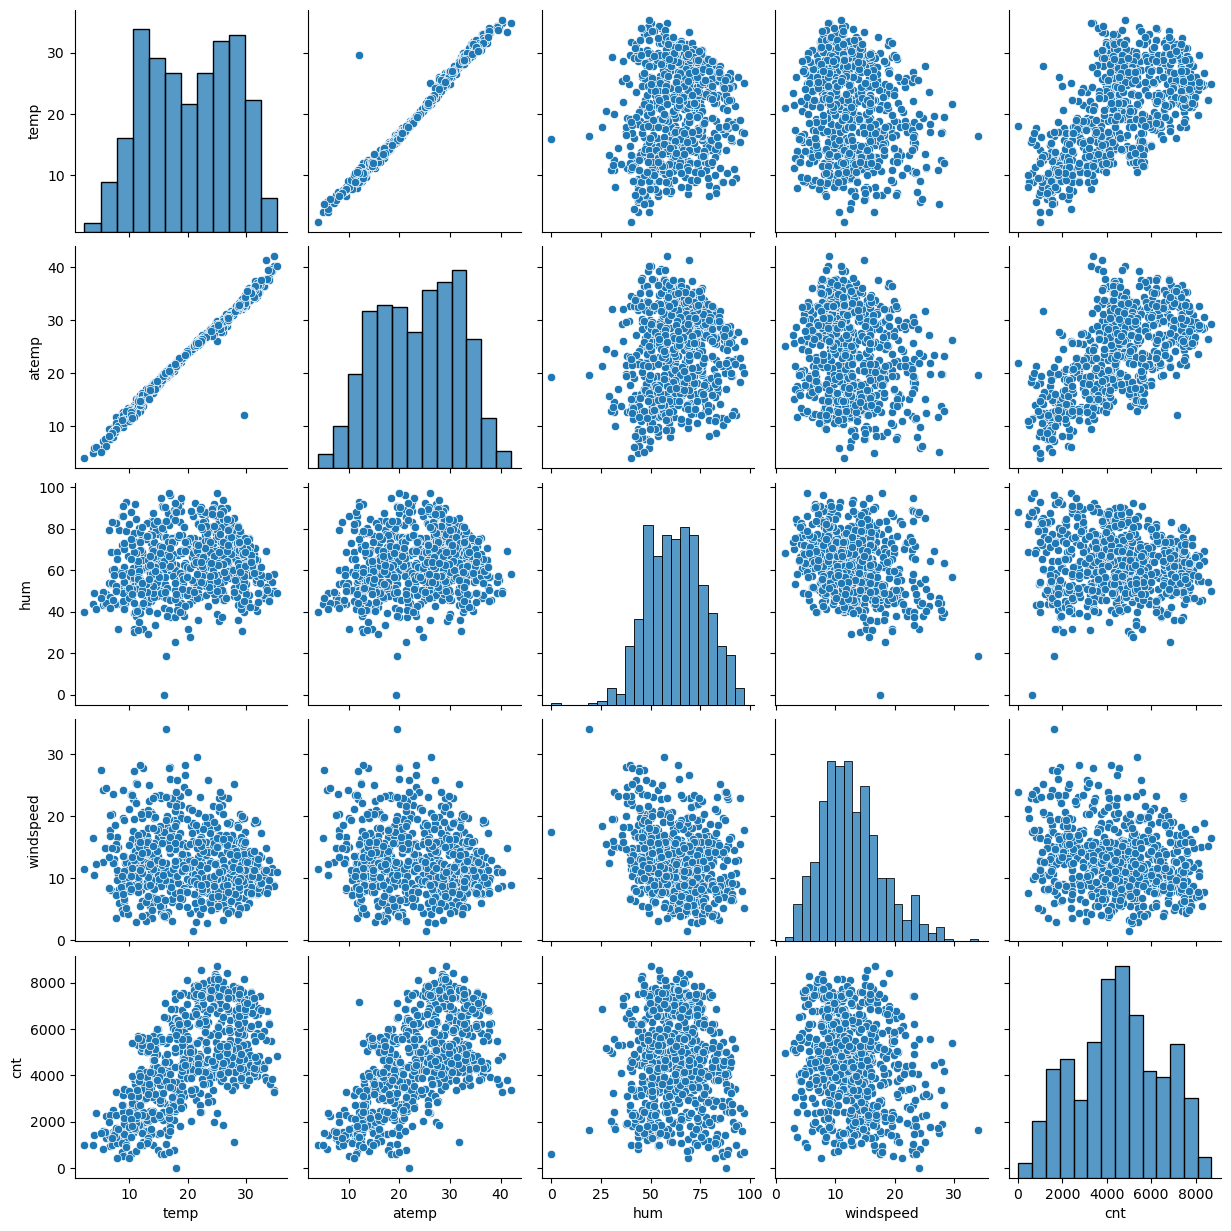

In [282]:
## Plotting Pairplot for Numerical Values
varnumerical=['temp','atemp','hum','windspeed','cnt']
sb.pairplot(day[varnumerical])
plt.show()

#### Inferences:
- From above scatter plots, we observe that 'cnt' has positive correlation with 'temp' and 'atemp'.
- There is strong correlation among the variables 'temp' and 'atemp'.
- So, we have to remove any one of them.
- As 'temp' is more sensible, we drop 'atemp'.

In [283]:
day=day.drop(['atemp'],axis=1)

In [284]:
day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,97.250000,34.000021,8714.000000


### Visualising Categorical Variables
As you might have noticed, there are a 7 categorical variables as well. Let's make a boxplot for some of these variables.
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
   - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
   - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
   - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
   - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

### Creating categories for season,mnth,weekday and weathersit
This will help better visualize the categories

In [285]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [286]:

#1. Season
day['season'] = day['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
print(day['season'].value_counts())

#2. mnth
day['mnth'] = day['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
print(day['mnth'].value_counts())

#3. weekday
day['weekday'] = day['weekday'].map({1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu',5:'Fri',6:'Sat',0:'Sun'})
print(day['weekday'].value_counts())

#4. weathersit
day['weathersit'] = day['weathersit'].map({1:'Clear', 2:'Mist', 3:'Light', 4:'Heavy'})
print(day['weathersit'].value_counts())

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64
mnth
Jan     62
Mar     62
May     62
Jul     62
Aug     62
Oct     62
Dec     62
Apr     60
Jun     60
Sept    60
Nov     60
Feb     56
Name: count, dtype: int64
weekday
Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: count, dtype: int64
weathersit
Clear    463
Mist     246
Light     21
Name: count, dtype: int64


In [287]:
day.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


### BoxPlot 

In [288]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


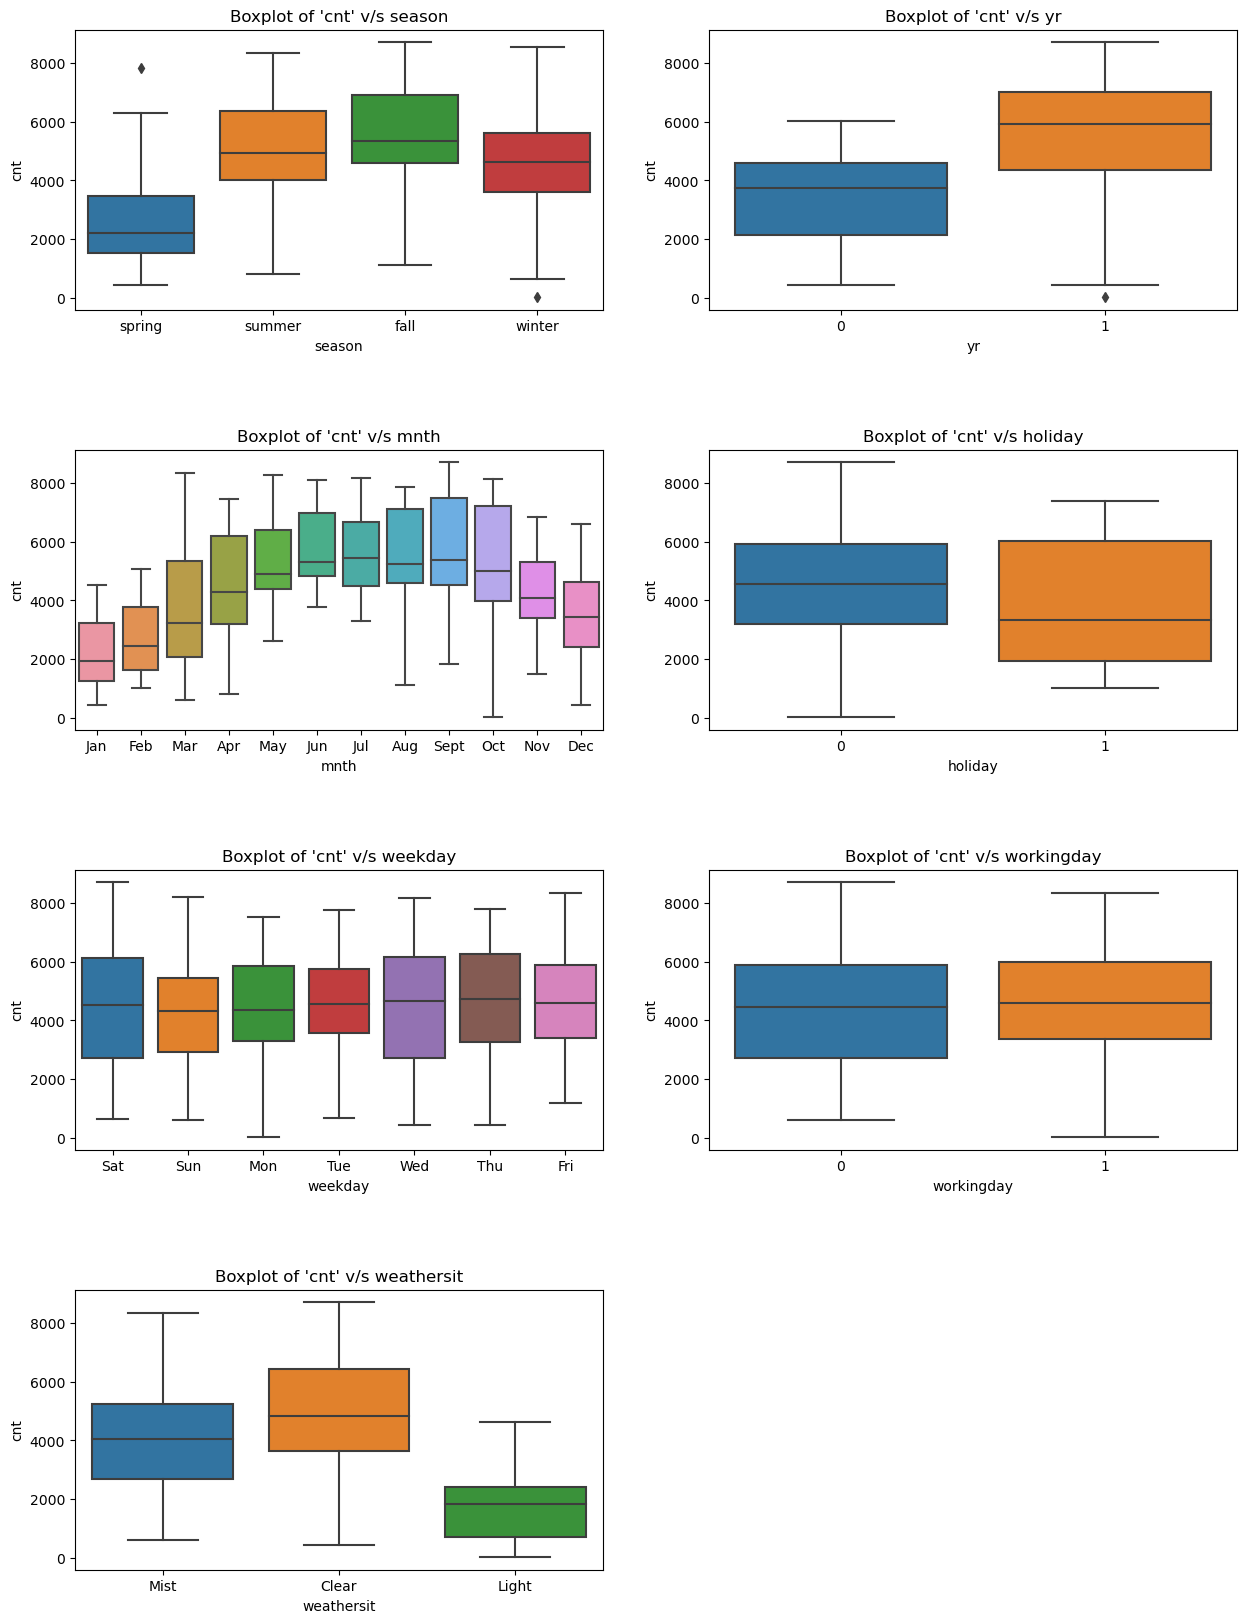

In [289]:
# creating categorical feature list
var_categorical=['season','yr','mnth','holiday','weekday','workingday','weathersit']


plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=.5)
for i, col in enumerate(var_categorical):
    plt.subplot(4,2,i+1)
    plt.title(label="Boxplot of 'cnt' v/s " + col)
    sb.boxplot(x=col, y='cnt', data=day);
    


#### Inference from Boxplot
 - 1. Bike Demand is higher during fall and summer from the month of May till October
 - 2. Bike demand was  higher in 2019
 - 3. Bike demand has been highr on Clear weather

###   Visualizing Correlation using heatmap

In [290]:
day.corr(numeric_only=True)

,yr,holiday,workingday,temp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.128565,-0.158186,0.627044
hum,-0.112547,-0.015662,0.023202,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,-0.098543,-0.235132,1.000000


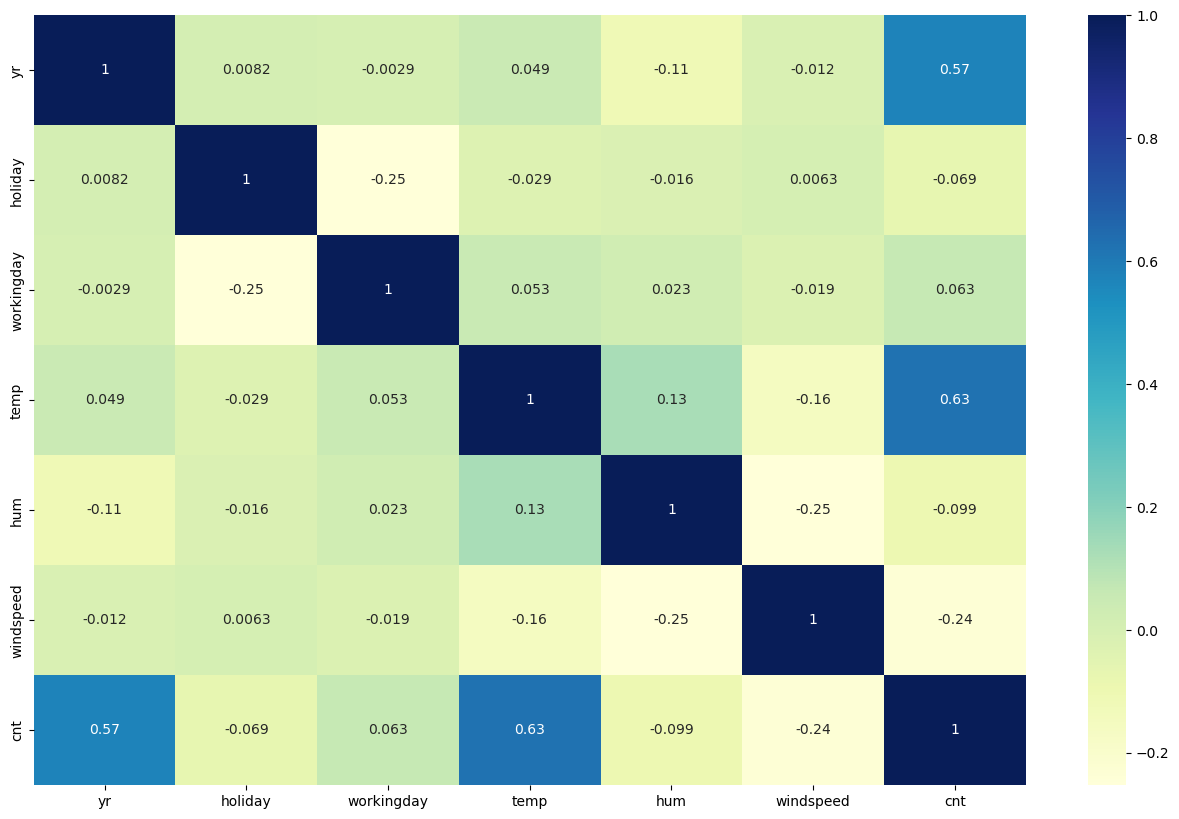

In [291]:

plt.figure(figsize=(16,10))
sb.heatmap(day.corr(numeric_only=True),annot=True,cmap="YlGnBu")
plt.show()

#### Inference for Heatmap
- 1. temp and cnt are highly correlated with correlation value 0.63
- 2. yr and cnt are highly correlated post above with correlation of 0.57

### Thus temp and year can  have high role in higher bike demands

### Univariate Analysis

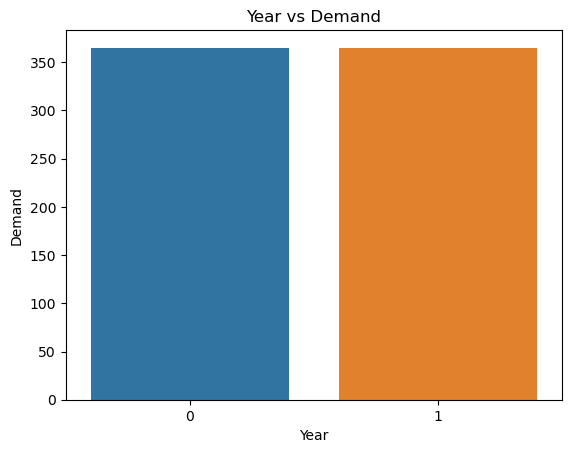

In [292]:
# print(df_3['loan_status'].value_counts())
# df_3['loan_status'].value_counts().plot(kind='bar')
## Year vs Demand

sb.countplot(x='yr', data=day)
plt.title('Year vs Demand')
plt.xlabel('Year')
plt.ylabel('Demand')
plt.show()

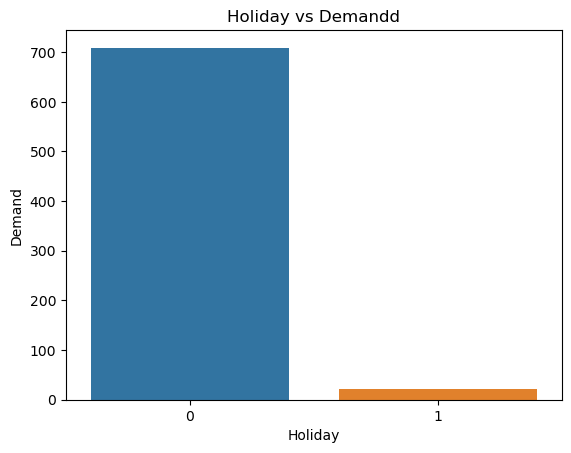

In [293]:
## Holiday vd Demand

sb.countplot(x='holiday', data=day)
plt.title('Holiday vs Demandd')
plt.xlabel('Holiday')
plt.ylabel('Demand')
plt.show()

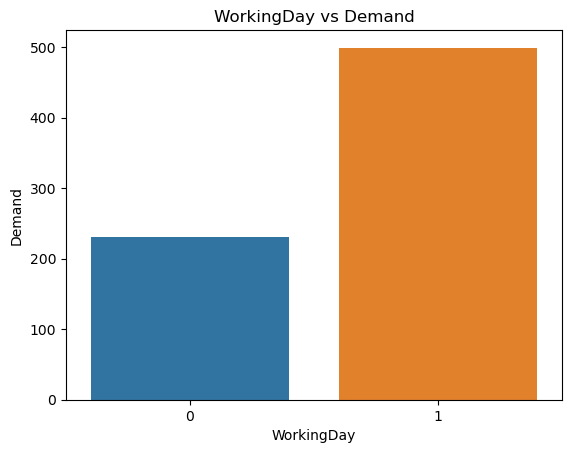

In [294]:
## WorkingDay vd Demand

sb.countplot(x='workingday', data=day)
plt.title('WorkingDay vs Demand')
plt.xlabel('WorkingDay')
plt.ylabel('Demand')
plt.show()

#### Inference : Univariate Analysis
1. yr has same amount of bike demand
2. Holidays sees lesser demand of bike than Working days

### Bivariate Analysis

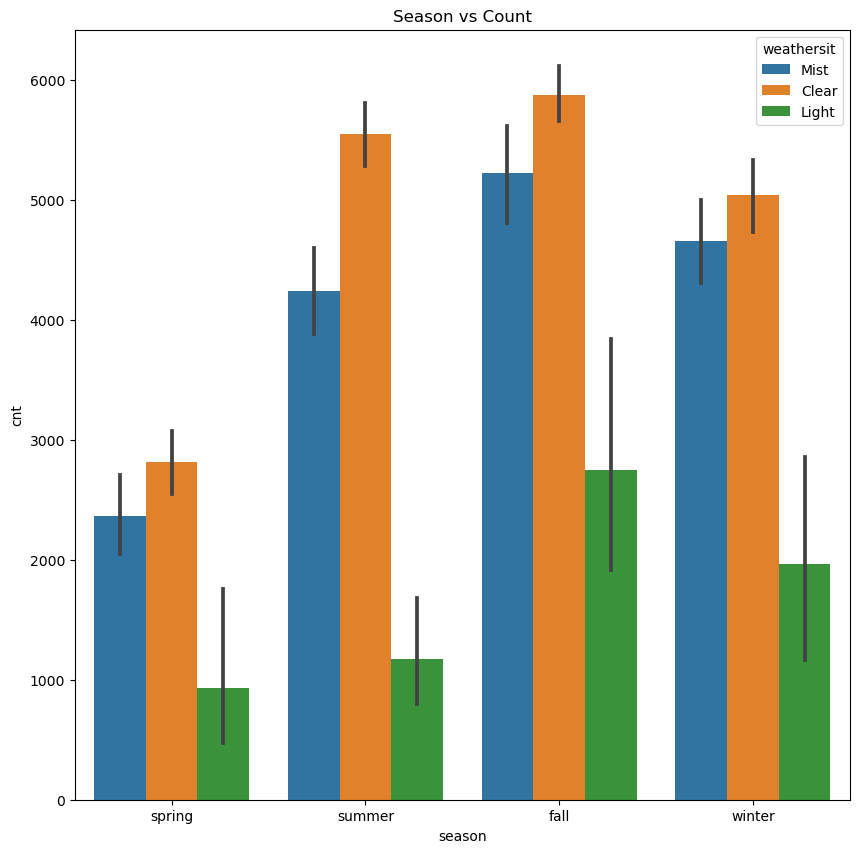

In [295]:
plt.figure(figsize=(10,10))
plt.title('Season vs Count')
sb.barplot(data =day,x='season', y='cnt',hue='weathersit')
plt.show()

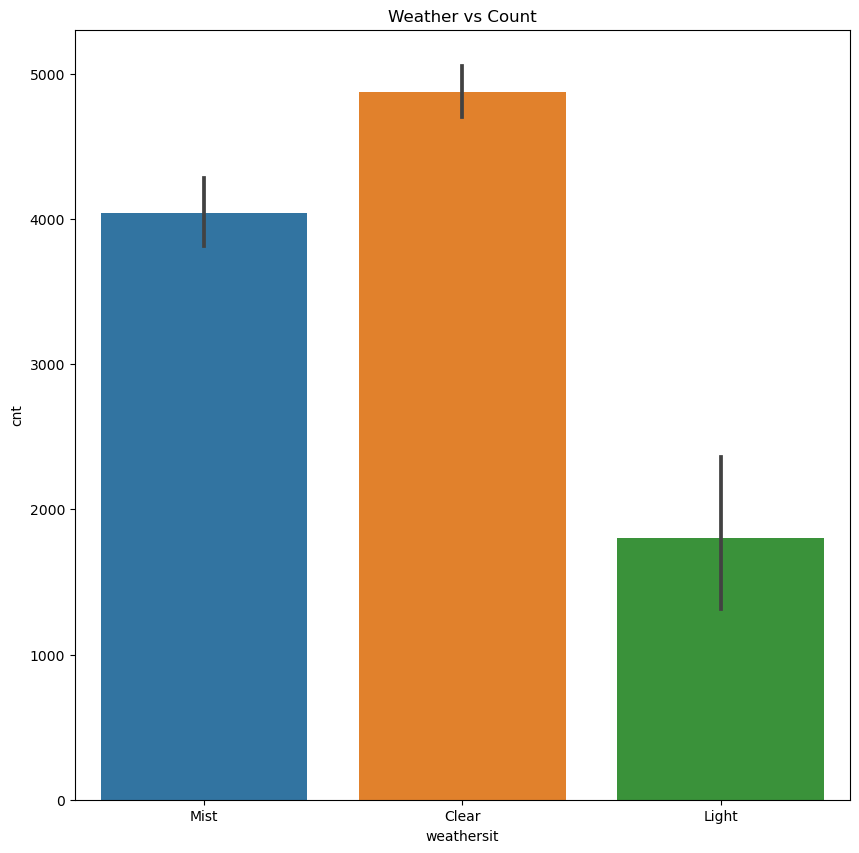

In [296]:
plt.figure(figsize=(10,10))
plt.title('Weather vs Count')
sb.barplot(data =day,x='weathersit', y='cnt')
plt.show()

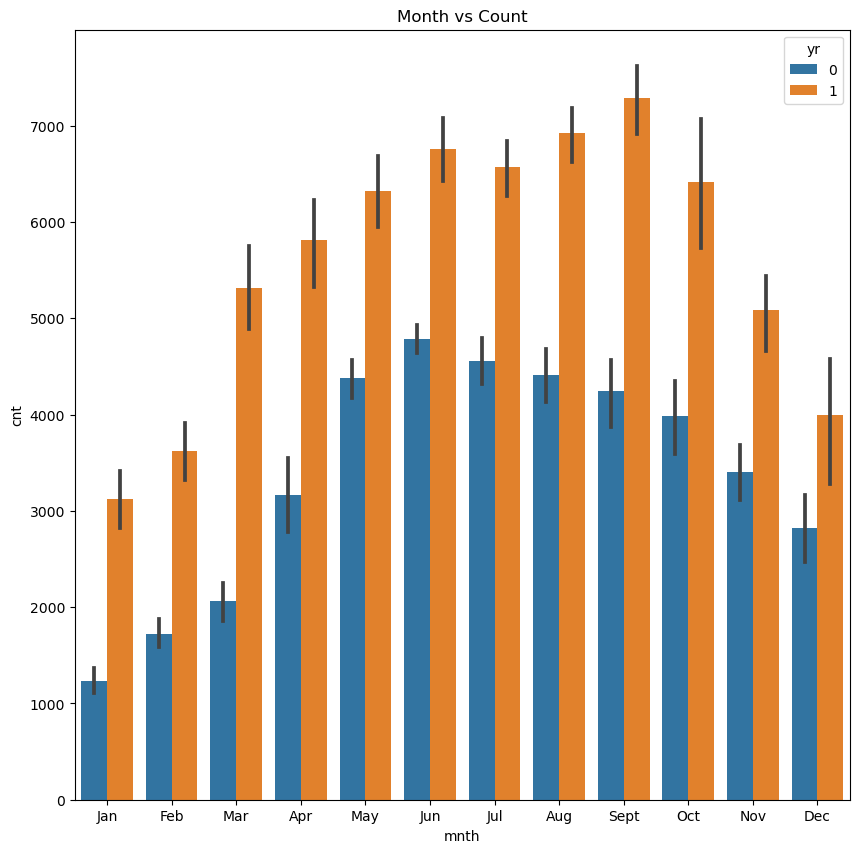

In [297]:
plt.figure(figsize=(10,10))
plt.title('Month vs Count')
sb.barplot(data =day,x='mnth', y='cnt',hue='yr')
plt.show()

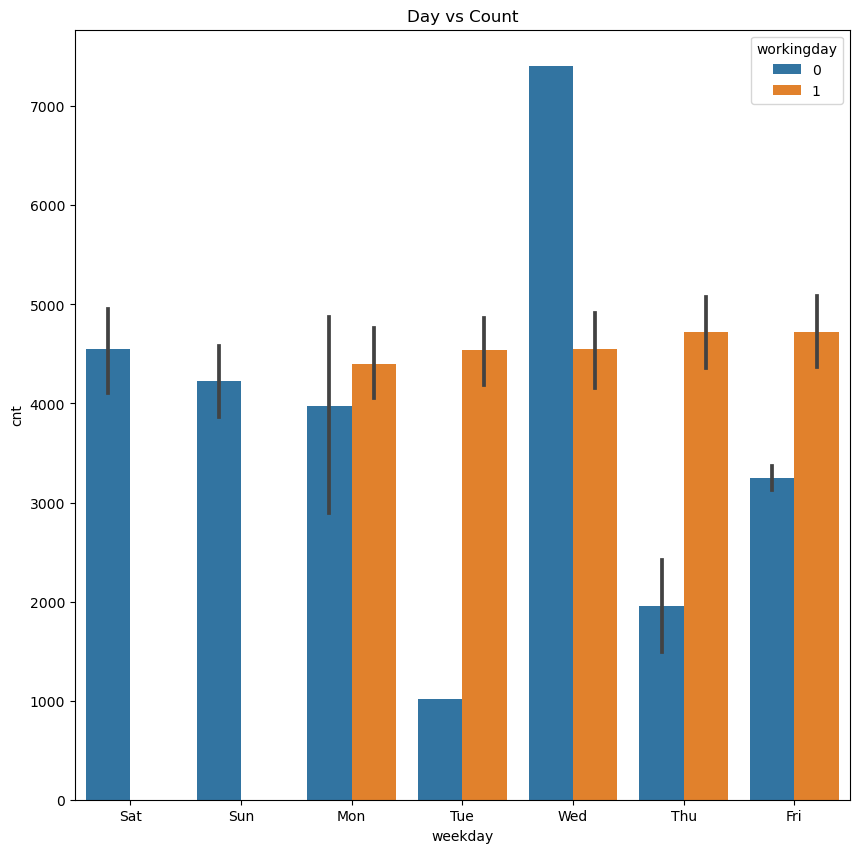

In [301]:
plt.figure(figsize=(10,10))
plt.title('Day vs Count')
sb.barplot(data =day,x='weekday', y='cnt',hue='workingday')
plt.show()

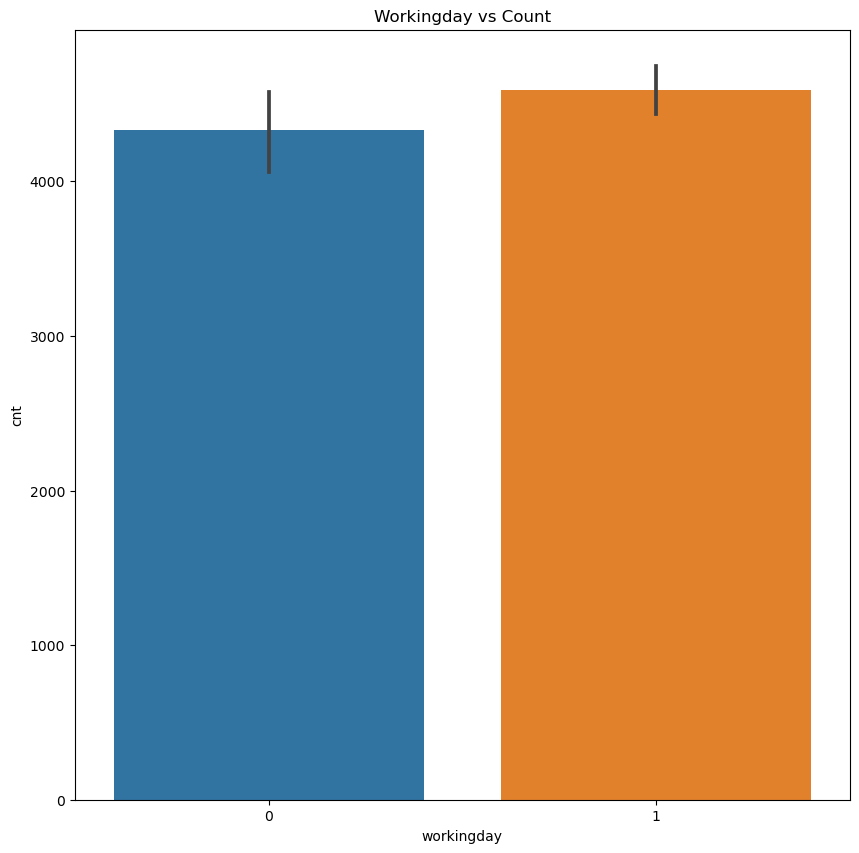

In [302]:
plt.figure(figsize=(10,10))
plt.title('Workingday vs Count')
sb.barplot(data =day,x='workingday', y='cnt')
plt.show()

#### Inference:
1. Bike Demand increases during fall(3) at clear weather(1)
2. Bike has higher demand in thhe month of June and Spetember
3. Monthly distribution of data agains year shows that the for every month the demand was higher in 2019 that 2018
4. Bike has higher demands on weekdays mostly on Wednesday,Thursday,Friday and Saturday.On wednesday demands has been higher on non-working days


## Step 3: Data Preparation

 ### Dummy Variables

The variable season,mnth,weekday and weathersit has  levels.We need to create dummy variables for them.

For this, we will use something called dummy variables.

In [201]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [202]:

# Creating dummy variables
# Let's drop the first column from status df using 'drop_first = True'
var_dumies=['season','mnth','weekday','weathersit']
status= pd.get_dummies(day[var_dumies].astype(str),dtype='int', drop_first = True)


In [203]:
# Add the results to the original day dataframe

day = pd.concat([day, status], axis = 1)

In [204]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
0,spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [205]:
# dropping all variables for whom dummy has been created
day=day.drop(['season','mnth','weekday','weathersit'],axis=1)

In [206]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                730 non-null    int64  
 1   holiday           730 non-null    int64  
 2   workingday        730 non-null    int64  
 3   temp              730 non-null    float64
 4   hum               730 non-null    float64
 5   windspeed         730 non-null    float64
 6   cnt               730 non-null    int64  
 7   season_spring     730 non-null    int32  
 8   season_summer     730 non-null    int32  
 9   season_winter     730 non-null    int32  
 10  mnth_Aug          730 non-null    int32  
 11  mnth_Dec          730 non-null    int32  
 12  mnth_Feb          730 non-null    int32  
 13  mnth_Jan          730 non-null    int32  
 14  mnth_Jul          730 non-null    int32  
 15  mnth_Jun          730 non-null    int32  
 16  mnth_Mar          730 non-null    int32  
 1

In [207]:
day.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Conclusion:
- Created dummy columns for 'season','mnth','weekday','weathersit'
- The dataframe now contains 29 columns thus adding adding 22 new dummy

In [208]:
# Perforform null value check
day.columns[day.isna().sum() > 0]

Index([], dtype='object')

### Inference:
- No null values post adding the dummy columns

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [209]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(day, train_size = 0.7, random_state = 100)

In [210]:
# printing the shape of training and test sets
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Rescaling the Features 

In [211]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [212]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [213]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


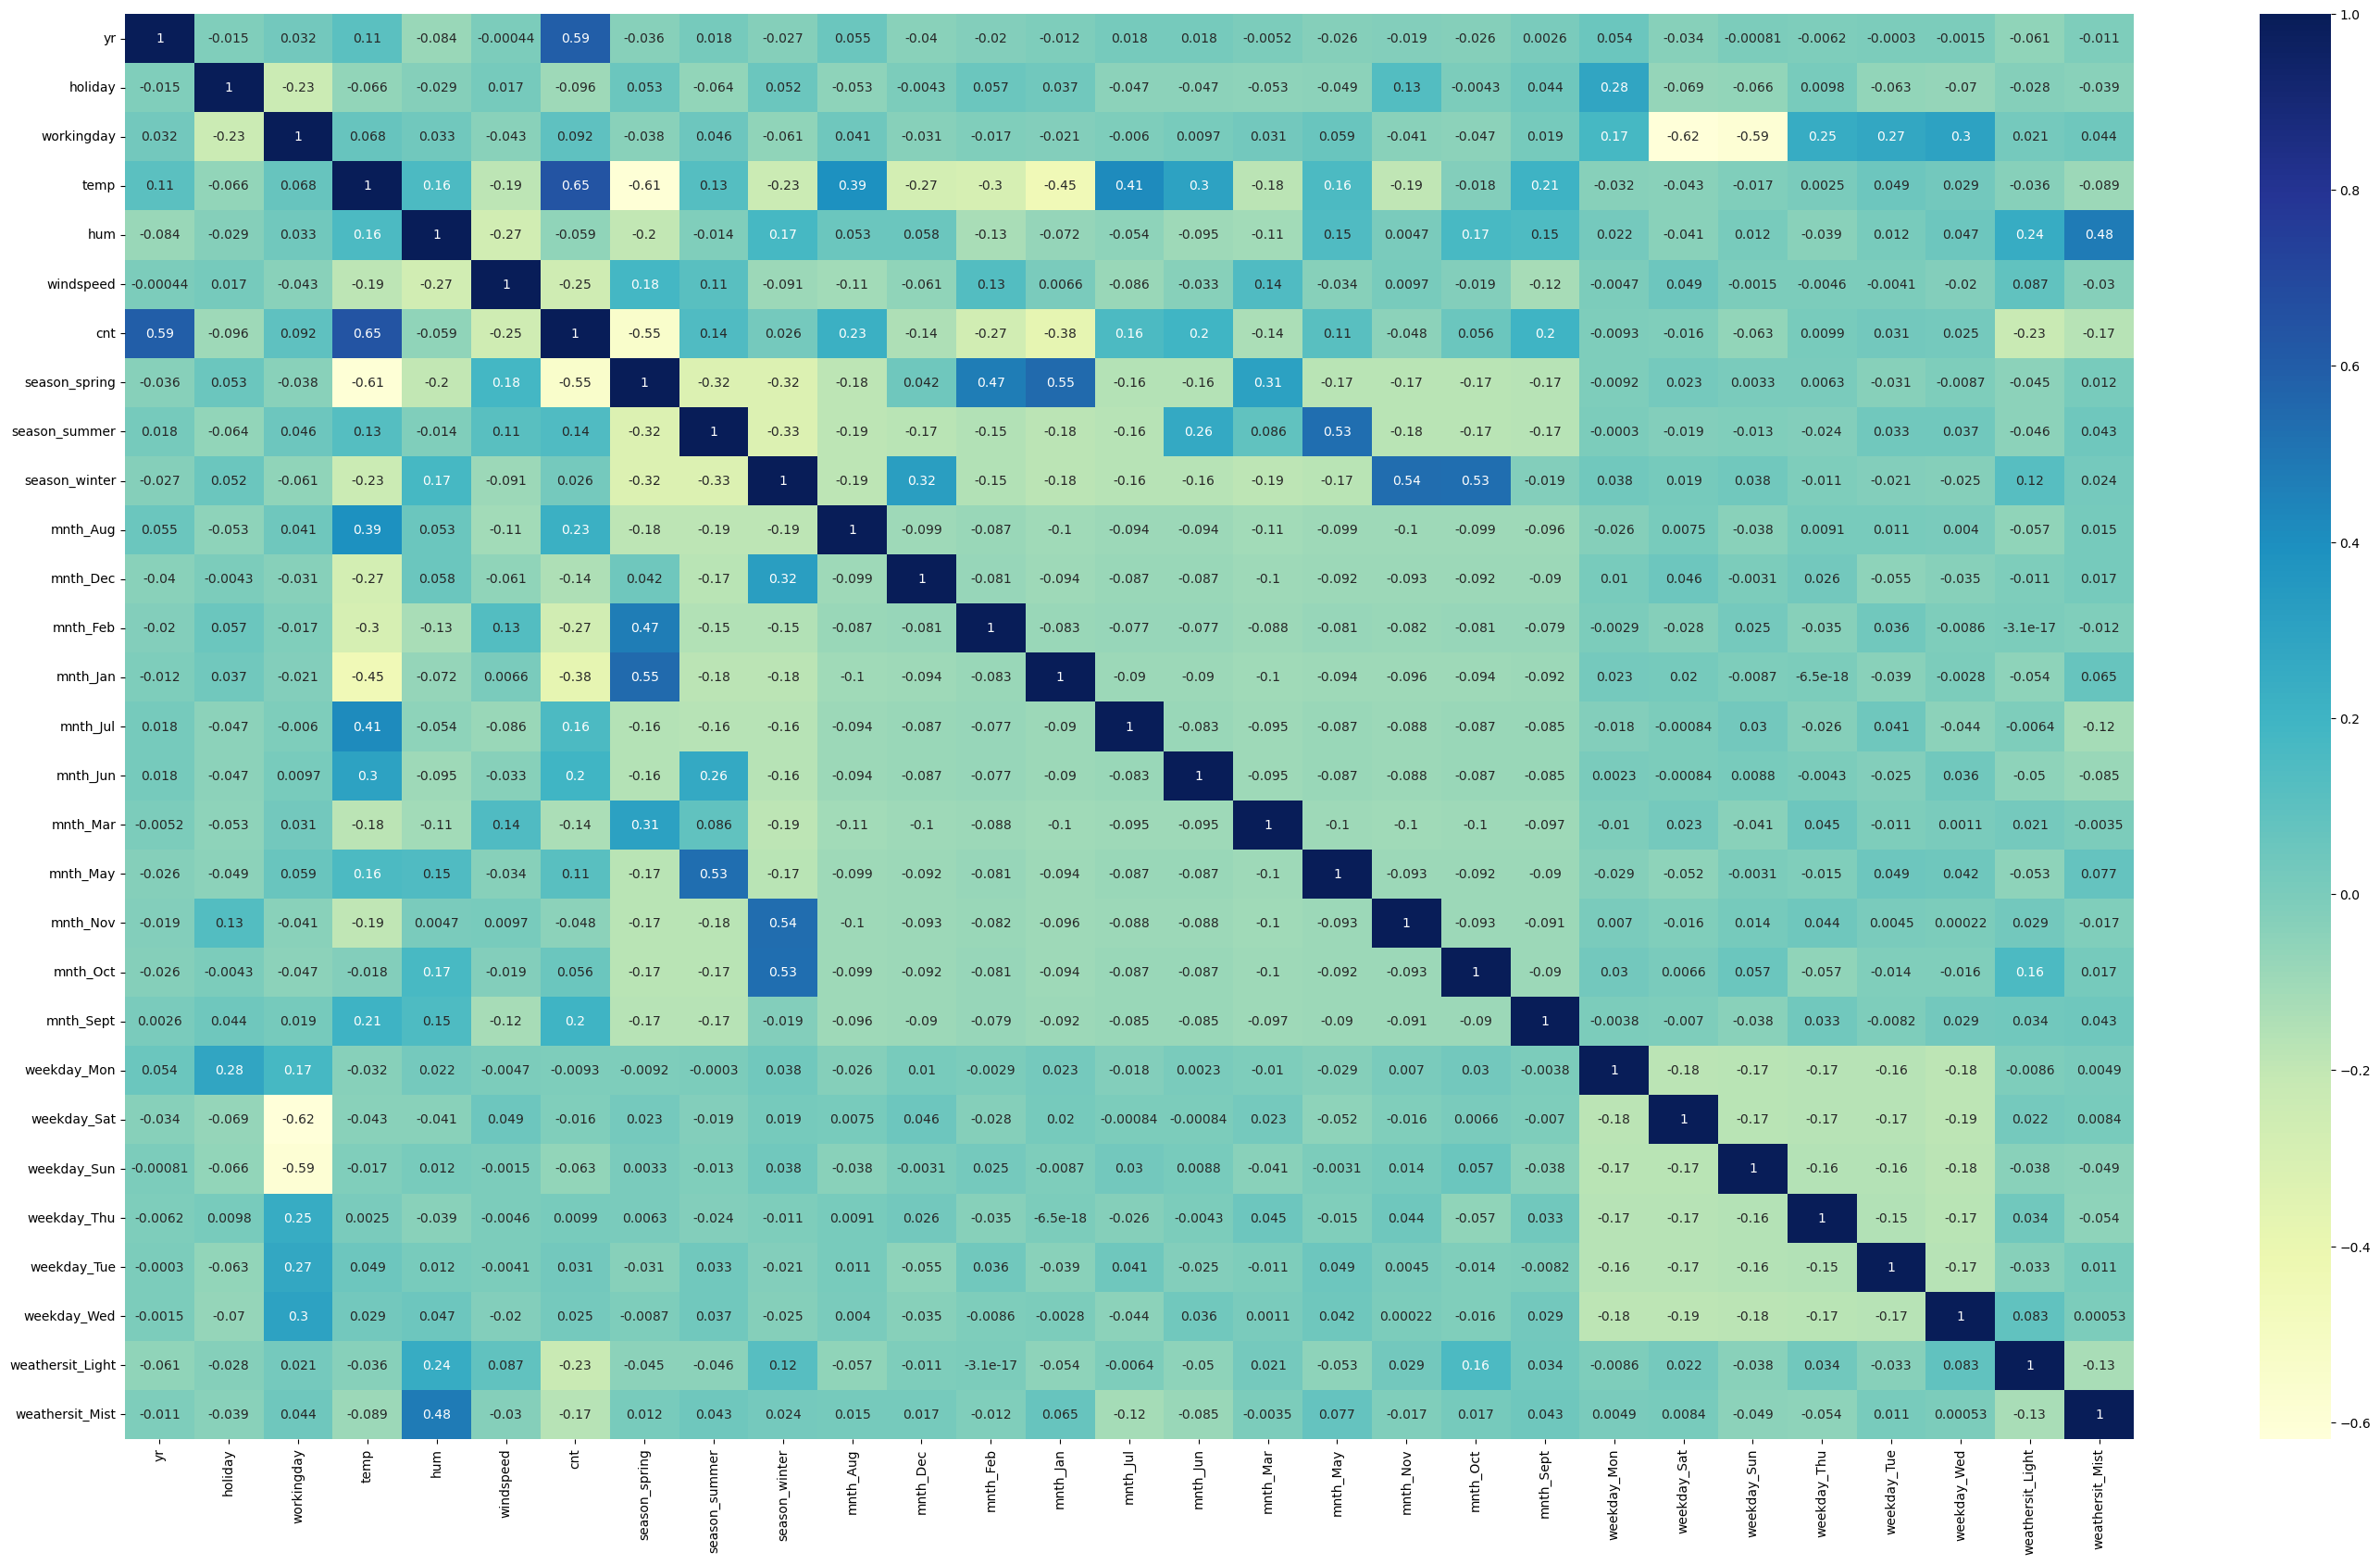

In [214]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (35, 20))
sb.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Inference:
- 1. Darker region denotes high correlation
- 2. yr and temp have high correlation with cnt

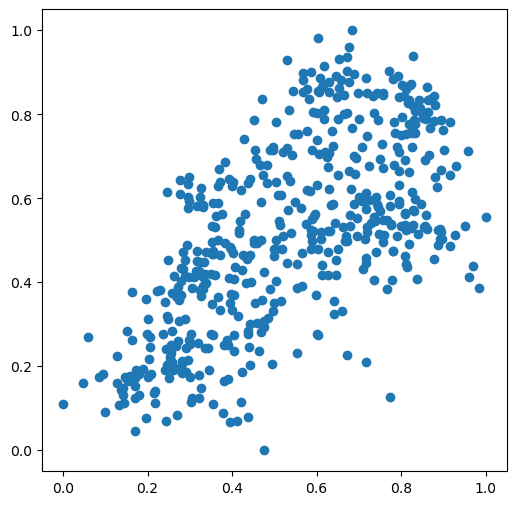

In [215]:
# Plotting Scatter plot for more inference

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

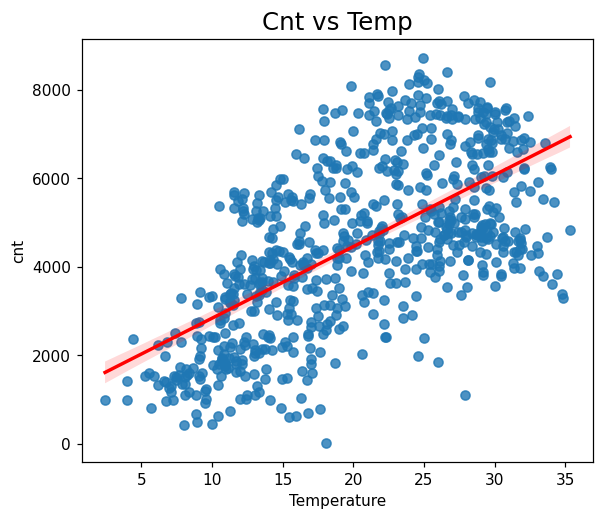

In [216]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sb.regplot(data=day,y="cnt",x="temp", line_kws={"color": "red"})
plt.xlabel("Temperature")
plt.show()

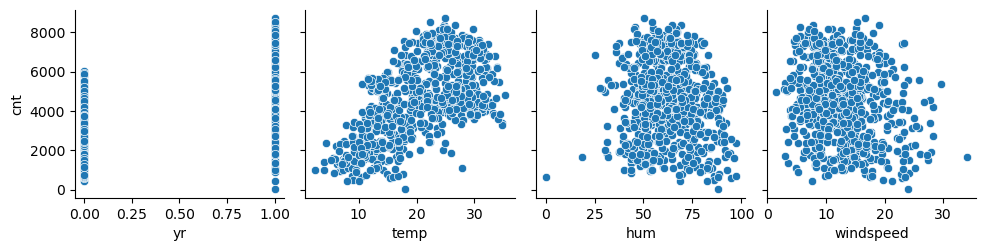

In [217]:
# Plotting pairplot to get more understanding on correlation

sb.pairplot(data=day,x_vars=['yr','temp','hum','windspeed'],y_vars=['cnt'])

### Inference:
Variable cnt has more linear regression with temp

### Dividing into X and Y sets for the model building

In [218]:
y_train = df_train.pop('cnt')
X_train = df_train
print(X_train.shape)
print(y_train.shape)

(510, 28)
(510,)


##  Build a Model using RFE and Automated approach

In [219]:
# Creating LinearRegression Object
lr=LinearRegression()

In [220]:
lr.fit(X_train,y_train)
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [221]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 12),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 7),
 ('weekday_Thu', False, 10),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 11),
 ('weathersit_Light', True, 1),
 ('weathersit_Mist', True, 1)]

In [222]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [223]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [224]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
rfe_columns=X_train.columns[rfe.support_]


In [225]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [226]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[rfe_columns]

In [227]:
X_train_rfe.shape

(510, 15)

In [228]:
# Calculate VIF
get_vif(rfe_columns)

            Features    VIF
4                hum  29.37
3               temp  17.78
2         workingday   5.31
5          windspeed   4.73
6      season_spring   4.53
8      season_winter   3.46
7      season_summer   2.85
14   weathersit_Mist   2.29
0                 yr   2.09
12       weekday_Sat   1.98
9           mnth_Jan   1.67
10          mnth_Jul   1.59
11         mnth_Sept   1.39
13  weathersit_Light   1.24
1            holiday   1.18


### Humidity has high VIF Value

## Model 1 - Start with all variables selected by RFE

In [229]:
#Selected columns for Model 1 - all columns selected by RFE
cols = rfe_columns

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          4.22e-191
Time:                        18:19:37   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2519      0.036  

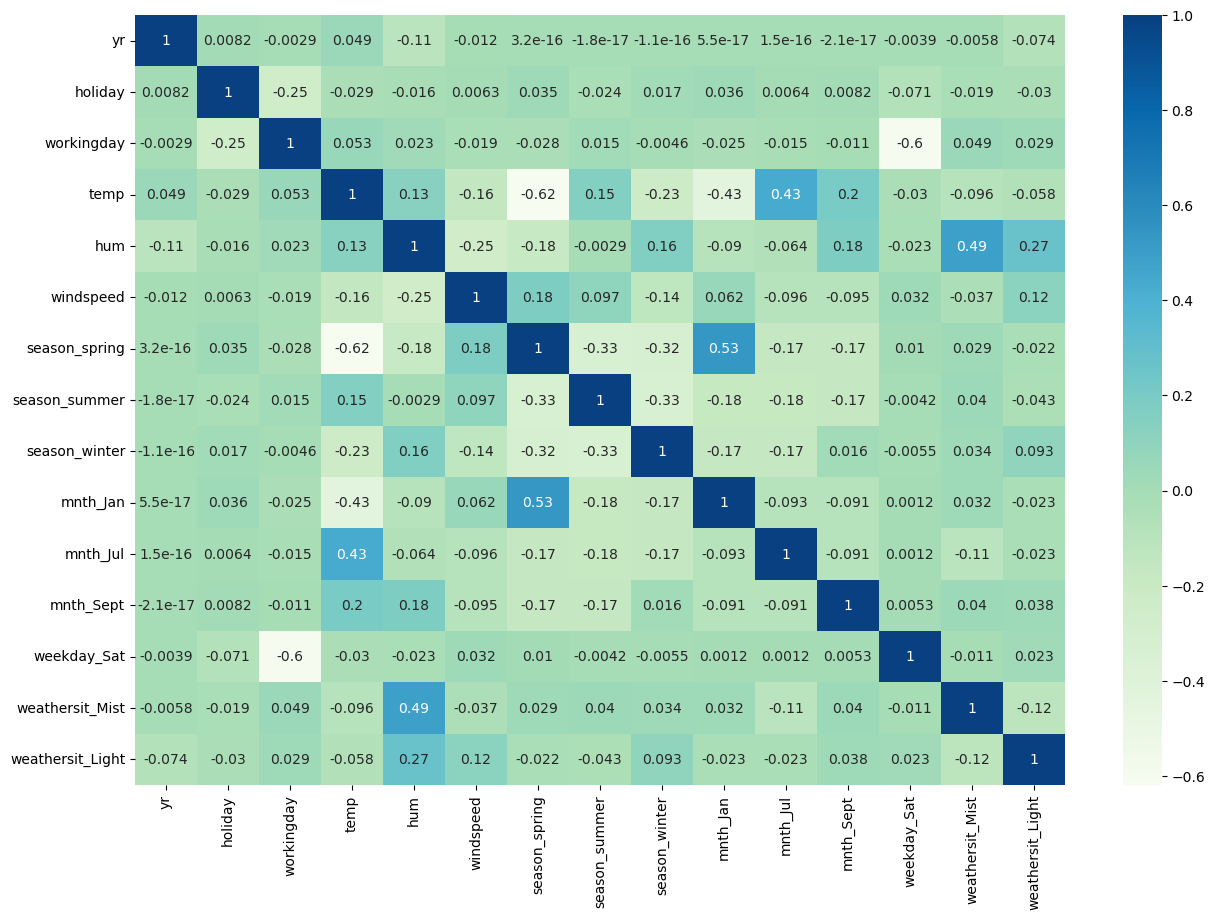

In [230]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sb.heatmap(day[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Sept', 'weekday_Sat',
       'weathersit_Mist', 'weathersit_Light']].corr(), cmap='GnBu', annot=True)
plt.show()

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

### 1st Linear Regression model

In [231]:
# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
# Create a first fitted model
lr_model1 = sm.OLS(y_train, X_train_lm).fit()
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          4.22e-191
Time:                        18:19:39   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2519      0.036      6.969      0.000       0.181       0.323
yr                   0.2305      0.008     28.795      0.000       0.215       0.246
holiday             -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday           0.0433      0.012      3.762      0.000       0.021       0.066
temp                 0.5096      0.034     14.837      0.000       0.442       0.577
hum                 -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed           -0.1863      0.025     -7.310      0.000      -0.236      -0.136
season_spring       -0.0509      0.021     -2.464      0.014      -0.091      -0.010
season_summer        0.0508      0.015      3.423      0.001       0.022       0.080
season_winter        0.0933      0.017      5.403      0.000       0.059       0.127
mnth_Jan            -0.0345      0.017     -1.989      0.047      -0.069      -0.000
mnth_Jul            -0.0529      0.018     -2.931      0.004      -0.088      -0.017
mnth_Sept            0.0814      0.016      4.945      0.000       0.049       0.114
weekday_Sat          0.0536      0.014      3.694      0.000       0.025       0.082
weathersit_Light    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
weathersit_Mist     -0.0563      0.010     -5.439      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [232]:
# Check the parameters obtained
lr_model1.params

const               0.251893
yr                  0.230527
holiday            -0.058173
workingday          0.043335
temp                0.509619
hum                -0.156299
windspeed          -0.186259
season_spring      -0.050897
season_summer       0.050762
season_winter       0.093301
mnth_Jan           -0.034512
mnth_Jul           -0.052918
mnth_Sept           0.081395
weekday_Sat         0.053552
weathersit_Light   -0.247464
weathersit_Mist    -0.056318
dtype: float64

In [233]:
# Calculate VIF
# Run the function to calculate VIF for the new model
get_vif(X_train_rfe.columns)

            Features    VIF
4                hum  29.37
3               temp  17.78
2         workingday   5.31
5          windspeed   4.73
6      season_spring   4.53
8      season_winter   3.46
7      season_summer   2.85
14   weathersit_Mist   2.29
0                 yr   2.09
12       weekday_Sat   1.98
9           mnth_Jan   1.67
10          mnth_Jul   1.59
11         mnth_Sept   1.39
13  weathersit_Light   1.24
1            holiday   1.18


#### Inference Model 1:
We get R-squared value of 0.848
- The variable hum has very high VIF (29.37) but low p value
So, we will first drop hum

In [234]:
X = X_train_rfe.drop('hum', axis=1)

### 2nd Linear Regression model

In [235]:
# Build 2nd model

X_train_lm = sm.add_constant(X)

lr_model2 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 2nd model
lr_model2 .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          1.60e-188
Time:                        18:19:44   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1737      0.031      5.520      0.000       0.112       0.235
yr                   0.2345      0.008     29.009      0.000       0.219       0.250
holiday             -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday           0.0464      0.012      3.966      0.000       0.023       0.069
temp                 0.4722      0.034     14.005      0.000       0.406       0.538
windspeed           -0.1563      0.025     -6.286      0.000      -0.205      -0.107
season_spring       -0.0599      0.021     -2.867      0.004      -0.101      -0.019
season_summer        0.0445      0.015      2.967      0.003       0.015       0.074
season_winter        0.0784      0.017      4.562      0.000       0.045       0.112
mnth_Jan            -0.0392      0.018     -2.227      0.026      -0.074      -0.005
mnth_Jul            -0.0479      0.018     -2.614      0.009      -0.084      -0.012
mnth_Sept            0.0755      0.017      4.527      0.000       0.043       0.108
weekday_Sat          0.0583      0.015      3.968      0.000       0.029       0.087
weathersit_Light    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
weathersit_Mist     -0.0813      0.009     -9.437      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [236]:
# Checking VIF again
get_vif(X.columns)

            Features   VIF
3               temp  7.07
2         workingday  5.24
4          windspeed  4.68
5      season_spring  3.07
6      season_summer  2.34
0                 yr  2.08
7      season_winter  1.98
11       weekday_Sat  1.97
8           mnth_Jan  1.62
9           mnth_Jul  1.59
13   weathersit_Mist  1.58
10         mnth_Sept  1.35
1            holiday  1.17
12  weathersit_Light  1.09


In [237]:
# We cannot drop temp as it has high correlation and dropping this would impact the model hence dropping holiday which has high p value= 0.042

In [238]:
# Removing holiday as it has both low VIF 1.17 and high p value 0.042 
X = X.drop('holiday', axis=1)


#### Inferences Model 2:
    - R-squared is quite high (0.843)
    - we will also look at VIF values to decide which variable to drop

### 3rd Linear Regression model

In [239]:
# Build 3rd model

X_train_lm = sm.add_constant(X)

lr_model3 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 2nd model
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          8.68e-189
Time:                        18:19:45   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1657      0.031      5.292      0.000       0.104       0.227
yr                   0.2346      0.008     28.941      0.000       0.219       0.251
workingday           0.0546      0.011      4.967      0.000       0.033       0.076
temp                 0.4724      0.034     13.966      0.000       0.406       0.539
windspeed           -0.1572      0.025     -6.306      0.000      -0.206      -0.108
season_spring       -0.0607      0.021     -2.899      0.004      -0.102      -0.020
season_summer        0.0448      0.015      2.980      0.003       0.015       0.074
season_winter        0.0775      0.017      4.499      0.000       0.044       0.111
mnth_Jan            -0.0398      0.018     -2.252      0.025      -0.074      -0.005
mnth_Jul            -0.0468      0.018     -2.549      0.011      -0.083      -0.011
mnth_Sept            0.0736      0.017      4.406      0.000       0.041       0.106
weekday_Sat          0.0667      0.014      4.710      0.000       0.039       0.094
weathersit_Light    -0.2896      0.024    -11.895      0.000      -0.337      -0.242
weathersit_Mist     -0.0807      0.009     -9.351      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       73.767   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.147
Skew:                          -0.734   Prob(JB):                     2.30e-41
Kurtosis:                       5.579   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [240]:
get_vif(X.columns)

            Features   VIF
2               temp  6.82
1         workingday  4.68
3          windspeed  4.66
4      season_spring  2.99
5      season_summer  2.33
0                 yr  2.08
6      season_winter  1.91
10       weekday_Sat  1.84
7           mnth_Jan  1.62
8           mnth_Jul  1.59
12   weathersit_Mist  1.58
9          mnth_Sept  1.34
11  weathersit_Light  1.09


In [241]:
# Dropping mnth_jan as it has high p value 0.02 but low VIF =1.12 . Also it has -ve coefficient hence it m=better to remove this column
X = X.drop('mnth_Jan', axis=1)

#### Inferences Model 3:
    - R-squared is quite high (0.841)
    - Dropped mnth_Jan with high p value 0.02
    - we will also look at VIF values to decide which variable to drop

### 4th Linear Regression model

In [242]:
# Build 4th model

X_train_lm = sm.add_constant(X)

lr_model4 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 2nd model
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          7.12e-189
Time:                        18:19:46   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1492      0.031      4.881      0.000       0.089       0.209
yr                   0.2339      0.008     28.756      0.000       0.218       0.250
workingday           0.0545      0.011      4.938      0.000       0.033       0.076
temp                 0.4920      0.033     14.991      0.000       0.427       0.556
windspeed           -0.1499      0.025     -6.040      0.000      -0.199      -0.101
season_spring       -0.0664      0.021     -3.182      0.002      -0.107      -0.025
season_summer        0.0481      0.015      3.196      0.001       0.019       0.078
season_winter        0.0838      0.017      4.910      0.000       0.050       0.117
mnth_Jul            -0.0486      0.018     -2.637      0.009      -0.085      -0.012
mnth_Sept            0.0740      0.017      4.414      0.000       0.041       0.107
weekday_Sat          0.0664      0.014      4.671      0.000       0.038       0.094
weathersit_Light    -0.2883      0.024    -11.795      0.000      -0.336      -0.240
weathersit_Mist     -0.0817      0.009     -9.428      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       72.429   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.537
Skew:                          -0.721   Prob(JB):                     1.40e-40
Kurtosis:                       5.560   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [243]:
# Checking VIF again
get_vif(X.columns)

            Features   VIF
2               temp  6.73
1         workingday  4.66
3          windspeed  4.64
4      season_spring  2.38
5      season_summer  2.32
0                 yr  2.07
6      season_winter  1.91
9        weekday_Sat  1.83
7           mnth_Jul  1.58
11   weathersit_Mist  1.57
8          mnth_Sept  1.34
10  weathersit_Light  1.08


In [244]:
# Removing mnth_Jul with p value 0.009 and VIF 1.58
X = X.drop('mnth_Jul', axis=1)

#### Inferences Model 4:
    - R-squared is quite high (0.840)
    - Dropped mnth_Jul with high p value 0.009
    - we will also look at VIF values to decide which variable to drop

### 5th Linear Regression model

In [245]:
# Build 5th model

X_train_lm = sm.add_constant(X)

lr_model5 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 2nd model
lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          1.42e-188
Time:                        18:19:47   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1406      0.031      4.597      0.000       0.080       0.201
yr                   0.2344      0.008     28.655      0.000       0.218       0.250
workingday           0.0555      0.011      4.996      0.000       0.034       0.077
temp                 0.4796      0.033     14.678      0.000       0.415       0.544
windspeed           -0.1500      0.025     -6.007      0.000      -0.199      -0.101
season_spring       -0.0554      0.021     -2.692      0.007      -0.096      -0.015
season_summer        0.0626      0.014      4.447      0.000       0.035       0.090
season_winter        0.0958      0.017      5.788      0.000       0.063       0.128
mnth_Sept            0.0873      0.016      5.423      0.000       0.056       0.119
weekday_Sat          0.0667      0.014      4.665      0.000       0.039       0.095
weathersit_Light    -0.2893      0.025    -11.765      0.000      -0.338      -0.241
weathersit_Mist     -0.0804      0.009     -9.241      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       76.073   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.745
Skew:                          -0.765   Prob(JB):                     1.71e-41
Kurtosis:                       5.548   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [246]:
# Checking VIF again
get_vif(X.columns)

            Features   VIF
2               temp  5.48
1         workingday  4.66
3          windspeed  4.64
4      season_spring  2.30
0                 yr  2.07
5      season_summer  2.00
8        weekday_Sat  1.83
6      season_winter  1.76
10   weathersit_Mist  1.57
7          mnth_Sept  1.23
9   weathersit_Light  1.08


In [247]:
# Removing season_spring with p value 0.007 and VIF 2.30
X = X.drop('season_spring', axis=1)

#### Inferences Model 5:
    - R-squared is quite high (0.838)
    - Removed season_spring as it has high p value 0.007
    - we will also look at VIF values to decide which variable to drop

### 6th Linear Regression model

In [248]:
# Build 6th model

X_train_lm = sm.add_constant(X)

lr_model6 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 6th model
lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          3.13e-188
Time:                        18:19:48   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0750      0.019      4.031      0.000       0.038       0.112
yr                   0.2331      0.008     28.370      0.000       0.217       0.249
workingday           0.0561      0.011      5.024      0.000       0.034       0.078
temp                 0.5499      0.020     27.861      0.000       0.511       0.589
windspeed           -0.1552      0.025     -6.195      0.000      -0.204      -0.106
season_summer        0.0886      0.010      8.608      0.000       0.068       0.109
season_winter        0.1307      0.010     12.600      0.000       0.110       0.151
mnth_Sept            0.0974      0.016      6.184      0.000       0.066       0.128
weekday_Sat          0.0675      0.014      4.693      0.000       0.039       0.096
weathersit_Light    -0.2871      0.025    -11.611      0.000      -0.336      -0.239
weathersit_Mist     -0.0800      0.009     -9.143      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       68.639   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.839
Skew:                          -0.731   Prob(JB):                     1.07e-33
Kurtosis:                       5.238   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [249]:
# Checking VIF again
get_vif(X.columns)

           Features   VIF
2              temp  4.76
1        workingday  4.04
3         windspeed  3.44
0                yr  2.02
7       weekday_Sat  1.69
4     season_summer  1.57
9   weathersit_Mist  1.53
5     season_winter  1.40
6         mnth_Sept  1.20
8  weathersit_Light  1.08


### Inferences Model 6:
    - R-squared is quite high (0.835)
    - All VIF are in range and no Feature has high p value hence we must stop here
    - Adj. R-squared:	0.832
    - F-statistic:	253.0
    -Prob (F-statistic):	3.13e-188
    

In [250]:
# Checking the parameters and their coefficient values
lr_model6.params

const               0.075009
yr                  0.233139
workingday          0.056117
temp                0.549892
windspeed          -0.155203
season_summer       0.088621
season_winter       0.130655
mnth_Sept           0.097365
weekday_Sat         0.067500
weathersit_Light   -0.287090
weathersit_Mist    -0.080022
dtype: float64

### Final Inference - Training Set
 - R-squared is 0.835
 - All VIF are in range and no Feature has high p value 
 - Adj. R-squared:0.832
 - F-statistic:253.0
 -Prob (F-statistic):3.13e-188
 -temp.yr ans season_winter have high coefficients hence are very important features
    


## Step 6.  Residual Analysis

<Axes: ylabel='Density'>

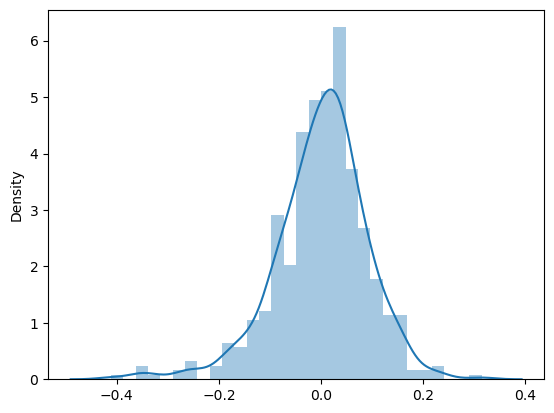

In [251]:
y_train_pred=lr_model6.predict(X_train_lm)
res=y_train-y_train_pred
sb.distplot(res)

In [252]:
r2_score(y_true=y_train,y_pred=y_train_pred)

0.8352749595695672

## Step 7. Prediction and Evaluation on Test Set

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [253]:
y_train_pred = lr_model6.predict(X_train_lm)

#### Error Terms Analysis

Text(0.5, 0, 'Errors')

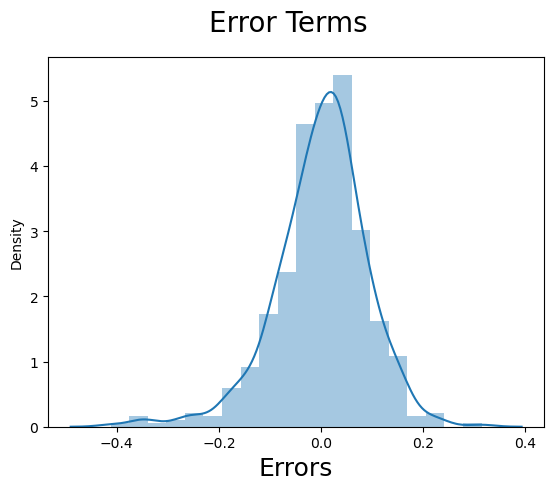

In [254]:
# Plot the histogram of the error terms
fig = plt.figure()
sb.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Error terms are following normal distribution

### Multicollinearity in final features

In [255]:
get_vif(X.columns)

           Features   VIF
2              temp  4.76
1        workingday  4.04
3         windspeed  3.44
0                yr  2.02
7       weekday_Sat  1.69
4     season_summer  1.57
9   weathersit_Mist  1.53
5     season_winter  1.40
6         mnth_Sept  1.20
8  weathersit_Light  1.08


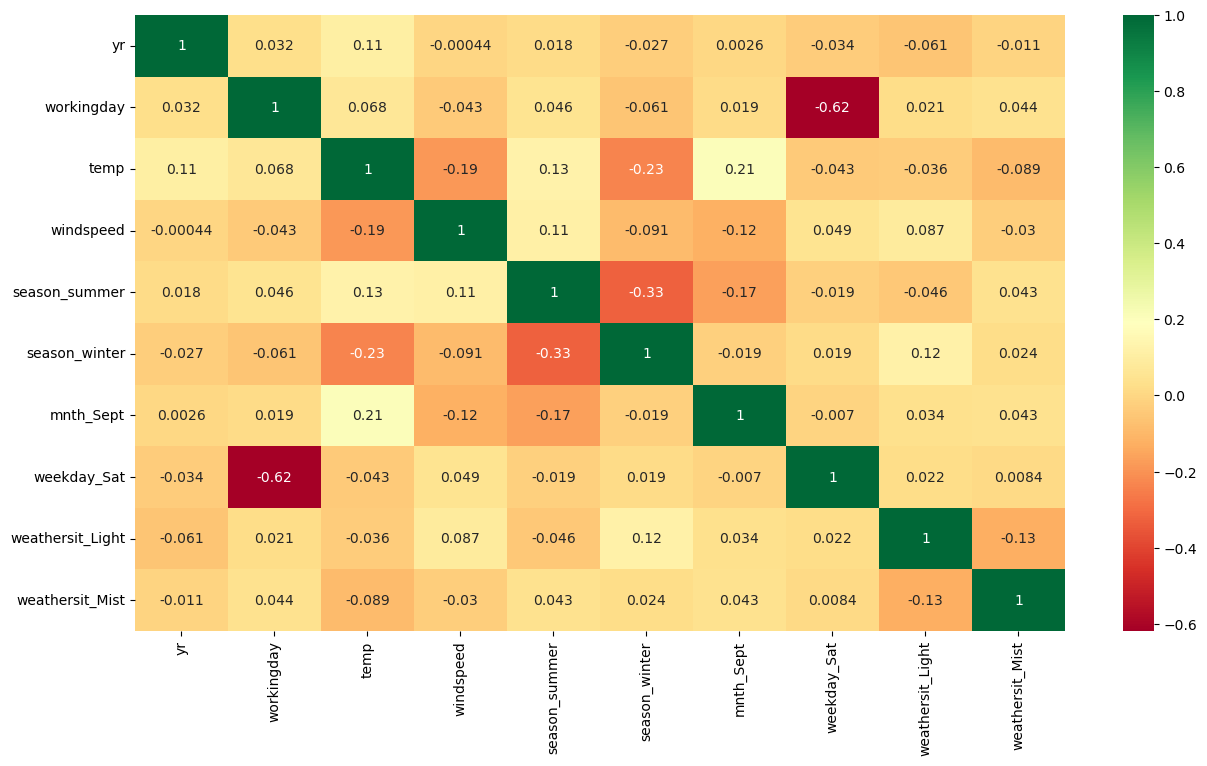

In [256]:
## Heatmap

plt.figure(figsize=(15,8))
sb.heatmap(X.corr(),annot = True, cmap="RdYlGn")
plt.show()

VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

#### Linearity 

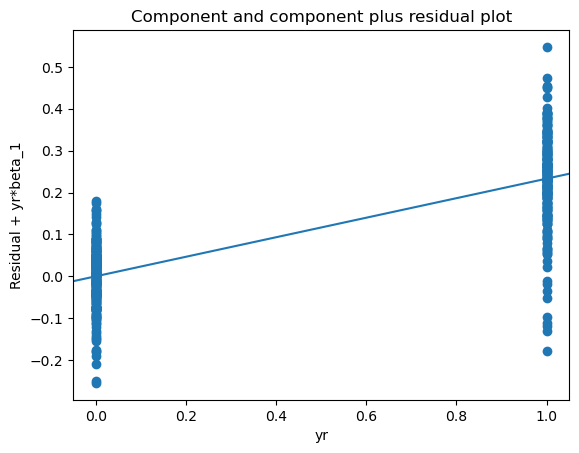

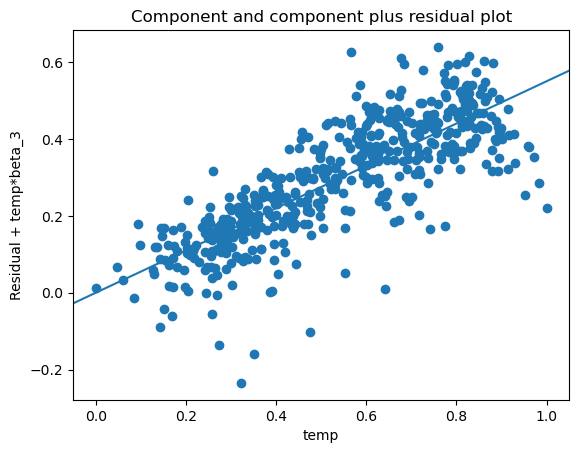

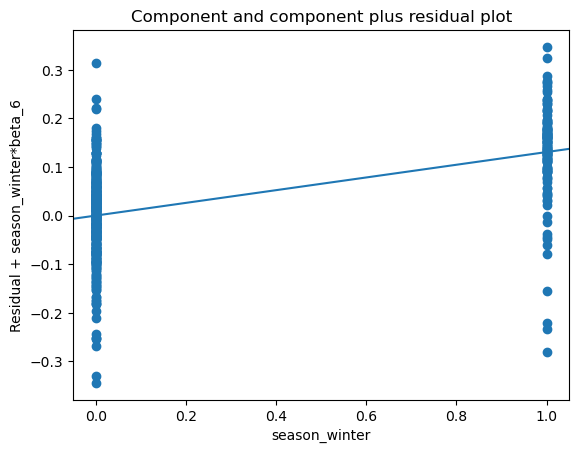

In [257]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_model6, 'yr')
plt.show()

sm.graphics.plot_ccpr(lr_model6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_model6, 'season_winter')
plt.show()

Linearity can be described using above plots

#### Homoscedasticity

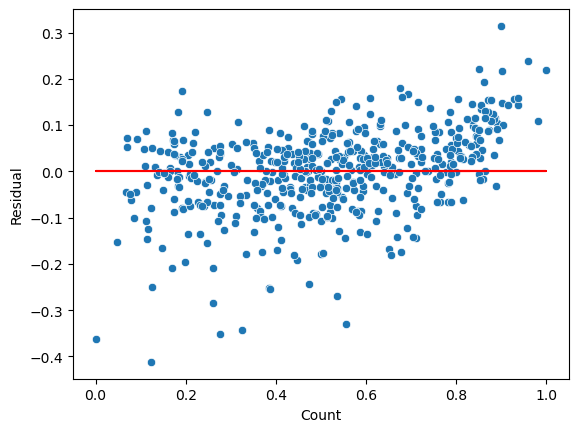

In [258]:
y_train_pred = lr_model6.predict(X_train_lm)
residual = y_train - y_train_pred
sb.scatterplot(x=y_train, y= residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No pattern for residual visible here

## Step 8: Making Predictions Using the Final Model

In [259]:
num_vars = ['temp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [260]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [261]:
#### Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [262]:
# Adding constant variable to test dataframe
col_test = X.columns
X_test=X_test[col_test]
X_test_m6 = sm.add_constant(X_test)
X_test_m6

,const,yr,workingday,temp,windspeed,season_summer,season_winter,mnth_Sept,weekday_Sat,weathersit_Light,weathersit_Mist
184,1.0,0,0,0.831783,0.084219,0,0,0,0,0,1
535,1.0,1,1,0.901354,0.153728,1,0,0,0,0,0
299,1.0,0,1,0.511964,0.334206,0,1,0,0,0,1
221,1.0,0,1,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,1,0.817246,0.537414,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,1,0.519232,0.283397,0,1,0,0,0,0
127,1.0,0,0,0.584649,0.069510,1,0,0,0,0,0
640,1.0,1,1,0.745598,0.052115,0,1,0,0,0,1
72,1.0,0,1,0.331557,0.203418,0,0,0,0,0,0


In [263]:
# Making predictions using the fourth model

y_pred_m6 = lr_model6.predict(X_test_m6)

In [264]:
r2 = r2_score(y_test, y_pred_m6)
r2

0.7961390438459766

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

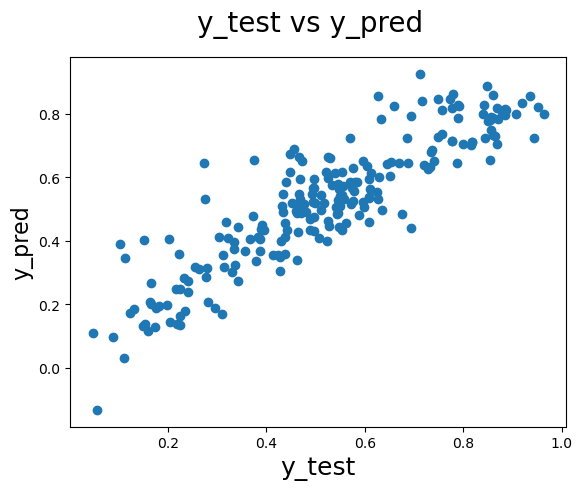

In [265]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m6)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [266]:
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_pred_m6))

0.8352749595695672
0.7961390438459766


In [267]:
r2=r2_score(y_true=y_test,y_pred=y_pred_m6)

In [268]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7864


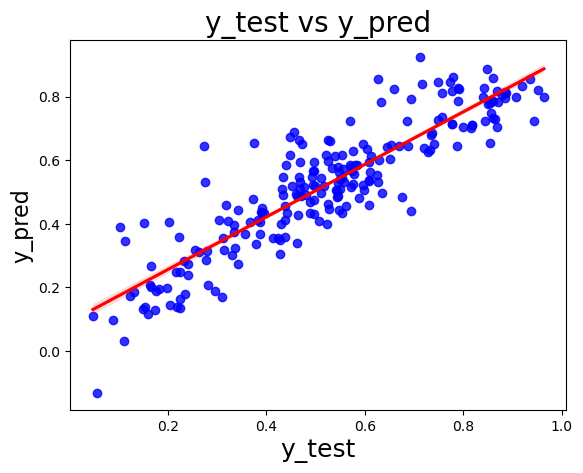

In [269]:
## Visualizing he fit on test sets
plt.figure()
sb.regplot(x=y_test, y=y_pred_m6, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Inference
1. temp,yr and season_winter have high coefficient values hence these features are most important in determining the demand
2. The r2_score for both train and test model are almost same 
   - r2 score for train: 0.8352749595695672
   - r2 score for test : 0.7961390438459766
3. VIF values are less than 5 which is good and also there is no multicolinearity.

4. Inference from training :
- R-squared is 0.835
  - All VIF are in range and no Feature has high p value 
  - Adj. R-squared:0.832
  - F-statistic:253.0
  -Prob (F-statistic):3.13e-188
5. We can cosider the above model , as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
  -  F-Statistics value of 253.0 (which is greater than 1) and the p-value of 3.13e-188 i.e almost equals to zero, states that the overall model is significant
  - AIC is -975.6 ,hence the model has better fit since it less than 0

